<a href="https://colab.research.google.com/github/rahulbouri/Age-GenderClassification-Adience-Dataset/blob/main/Adience_Dataset_Age%26GenderClassifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Adience')

In [ ]:
fold_0=pd.read_table('/content/drive/MyDrive/Adience/fold_0_data.txt')
fold_0

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...
4479,68094148@N04,11373794746_4720ac792a_o.jpg,478,"(25, 32)",m,664,0,242,211,-5,-15,73
4480,68094148@N04,11355711315_0f5b5da125_o.jpg,477,"(25, 32)",f,915,51,109,112,0,45,14
4481,10693681@N00,9162730346_b1bf71120a_o.jpg,479,"(25, 32)",m,2145,1270,249,249,10,30,25
4482,113830953@N04,11855529986_dff116e018_o.jpg,480,None,NaN,2878,1300,306,306,-100,0,164


In [ ]:
fold_1=pd.read_table('/content/drive/MyDrive/Adience/fold_1_data.txt')
fold_1

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,114841417@N06,12068804204_085d553238_o.jpg,481,"(60, 100)",f,1141,780,975,976,0,0,118
1,114841417@N06,12068804204_085d553238_o.jpg,482,"(48, 53)",m,1821,283,969,969,-25,15,35
2,114841417@N06,12078357226_5fdd9367de_o.jpg,483,"(4, 6)",f,1788,341,306,306,-10,0,168
3,114841417@N06,12019067874_0e988248af_o.jpg,483,"(4, 6)",f,3,183,932,777,-115,0,27
4,114841417@N06,12077009614_2490487d2a_o.jpg,484,45,f,258,133,1734,1734,15,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
3725,35953373@N04,9496952502_4e87cc8b60_o.jpg,907,"(15, 20)",m,1318,184,643,644,5,-30,78
3726,104937236@N08,11852401355_e54eba57b6_o.jpg,908,"(27, 32)",f,1310,725,573,573,-90,0,90
3727,37404707@N08,11128849885_6a56d25762_o.jpg,909,"(8, 12)",NaN,820,1099,364,364,-5,0,103
3728,37404707@N08,11182710183_e75c82dde1_o.jpg,910,"(60, 100)",NaN,1080,661,376,376,-5,0,61


In [ ]:
fold_2=pd.read_table('/content/drive/MyDrive/Adience/fold_2_data.txt')
fold_2

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,64504106@N06,11831304783_488d6c3a6d_o.jpg,911,"(0, 2)",m,438,914,605,606,-90,0,123
1,64504106@N06,11849646776_35253e988f_o.jpg,911,"(0, 2)",m,19,712,1944,1736,-105,0,86
2,64504106@N06,11848166326_57b03f535e_o.jpg,911,"(0, 2)",m,382,680,1785,1768,-80,0,14
3,64504106@N06,11812546385_bb4d020dde_o.jpg,911,"(0, 2)",m,608,948,893,892,-105,0,8
4,64504106@N06,11831118625_81dcc72e75_o.jpg,912,"(38, 43)",m,23,150,508,508,-90,0,79
...,...,...,...,...,...,...,...,...,...,...,...,...
3889,19393853@N00,10701729133_9b74be645f_o.jpg,1317,None,NaN,2288,725,255,255,0,15,32
3890,19393853@N00,9767778096_b9ff679fb8_o.jpg,1317,None,NaN,508,337,1581,1581,-90,30,39
3891,19393853@N00,9709082628_9f1075d8ae_o.jpg,1317,None,NaN,326,93,954,867,-115,0,64
3892,19393853@N00,9767518631_71261193e8_o.jpg,1317,None,NaN,1246,353,994,995,-105,30,149


In [ ]:
fold_3=pd.read_table('/content/drive/MyDrive/Adience/fold_3_data.txt')
fold_3

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,113445054@N07,11763777465_11d01c34ce_o.jpg,1322,"(25, 32)",m,1102,296,357,357,-15,0,59
1,113445054@N07,11763777465_11d01c34ce_o.jpg,1323,"(25, 32)",f,1713,580,325,325,-5,0,118
2,113445054@N07,11763777465_11d01c34ce_o.jpg,1324,"(15, 20)",f,1437,664,306,306,5,0,109
3,113445054@N07,11764005785_f21921aea6_o.jpg,1325,"(25, 32)",f,978,229,803,803,-20,-45,16
4,113445054@N07,11763728674_a41d99f71e_o.jpg,1326,"(25, 32)",m,1745,910,242,242,-10,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...
3441,113728563@N05,11827967936_b29e8e87eb_o.jpg,1739,None,NaN,0,0,768,921,0,0,78
3442,113728563@N05,11826123976_c7d6738478_o.jpg,1742,None,NaN,450,906,932,932,0,0,127
3443,113728563@N05,11827955196_c97e4f877d_o.jpg,1743,None,NaN,72,142,560,560,20,0,13
3444,113728563@N05,11826168836_69124b9bdf_o.jpg,1741,None,NaN,0,1284,921,1160,-105,-30,74


In [ ]:
fold_4=pd.read_table('/content/drive/MyDrive/Adience/fold_4_data.txt')
fold_4

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,115321157@N03,12111738395_a7f715aa4e_o.jpg,1744,"(4, 6)",m,663,997,637,638,-95,0,129
1,115321157@N03,12112413505_0aea8e17c6_o.jpg,1745,"(48, 53)",m,505,846,433,433,-95,0,72
2,115321157@N03,12112392255_995532c2f0_o.jpg,1744,"(4, 6)",m,517,1185,383,383,0,0,70
3,115321157@N03,12112392255_995532c2f0_o.jpg,1746,"(25, 32)",m,2247,688,376,376,0,30,67
4,115321157@N03,12112392255_995532c2f0_o.jpg,1747,"(25, 32)",m,1421,667,325,325,0,0,102
...,...,...,...,...,...,...,...,...,...,...,...,...
3811,7153718@N04,11598838386_349a0d4849_o.jpg,2282,None,NaN,596,460,1472,1473,-75,0,30
3812,7153718@N04,11598166203_c70bb34c80_o.jpg,2283,None,NaN,1179,755,331,331,5,0,108
3813,7153718@N04,11598166203_c70bb34c80_o.jpg,2282,None,NaN,1201,1179,293,293,5,0,99
3814,7153718@N04,11598145163_733cb99713_o.jpg,2282,None,NaN,1027,946,408,408,-85,0,49


In [ ]:
total_data = pd.concat([fold_0, fold_1, fold_2, fold_3, fold_4], ignore_index=True)
print(total_data.shape)

(19370, 12)


In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             19370 non-null  object
 1   original_image      19370 non-null  object
 2   face_id             19370 non-null  int64 
 3   age                 19370 non-null  object
 4   gender              18591 non-null  object
 5   x                   19370 non-null  int64 
 6   y                   19370 non-null  int64 
 7   dx                  19370 non-null  int64 
 8   dy                  19370 non-null  int64 
 9   tilt_ang            19370 non-null  int64 
 10  fiducial_yaw_angle  19370 non-null  int64 
 11  fiducial_score      19370 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.8+ MB


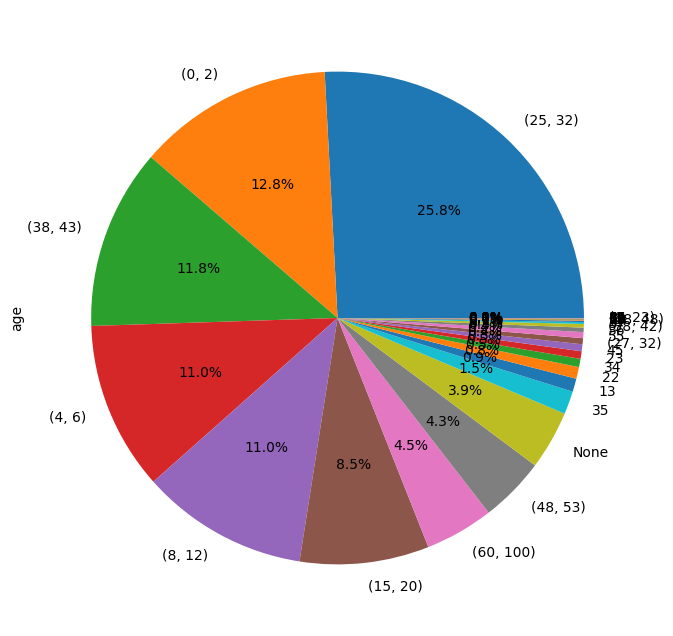

In [ ]:
#Pie chart of the age distribution

plt.figure(1, figsize=(8,8))
total_data.age.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [ ]:
total_data

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...
19365,7153718@N04,11598838386_349a0d4849_o.jpg,2282,None,NaN,596,460,1472,1473,-75,0,30
19366,7153718@N04,11598166203_c70bb34c80_o.jpg,2283,None,NaN,1179,755,331,331,5,0,108
19367,7153718@N04,11598166203_c70bb34c80_o.jpg,2282,None,NaN,1201,1179,293,293,5,0,99
19368,7153718@N04,11598145163_733cb99713_o.jpg,2282,None,NaN,1027,946,408,408,-85,0,49


In [ ]:
#Picking out the relevant columns for our predictions

df = total_data[['user_id', 'original_image', 'age', 'gender']].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         19370 non-null  object
 1   original_image  19370 non-null  object
 2   age             19370 non-null  object
 3   gender          18591 non-null  object
dtypes: object(4)
memory usage: 605.4+ KB


In [ ]:
# Adding Path of each Image
img_path = []
for row in total_data.iterrows():
    path = str("/content/drive/MyDrive/Adience/aligned/"+row[1].user_id+"/landmark_aligned_face."+str(row[1].face_id)+"."+row[1].original_image)
    img_path.append(path)
df['img_path'] = img_path

In [ ]:
df.head()

,user_id,original_image,age,gender,img_path
0,30601258@N03,10399646885_67c7d20df9_o.jpg,"(25, 32)",f,/content/drive/MyDrive/Adience/aligned/3060125...
1,30601258@N03,10424815813_e94629b1ec_o.jpg,"(25, 32)",m,/content/drive/MyDrive/Adience/aligned/3060125...
2,30601258@N03,10437979845_5985be4b26_o.jpg,"(25, 32)",f,/content/drive/MyDrive/Adience/aligned/3060125...
3,30601258@N03,10437979845_5985be4b26_o.jpg,"(25, 32)",m,/content/drive/MyDrive/Adience/aligned/3060125...
4,30601258@N03,11816644924_075c3d8d59_o.jpg,"(25, 32)",m,/content/drive/MyDrive/Adience/aligned/3060125...


In [ ]:
df.age.unique()

array(['(25, 32)', '(38, 43)', '(4, 6)', '(60, 100)', '(15, 20)',
       '(48, 53)', '(8, 12)', '(0, 2)', 'None', '(38, 48)', '35', '3',
       '55', '58', '22', '13', '45', '36', '23', '(38, 42)', '(8, 23)',
       '(27, 32)', '57', '56', '2', '29', '34', '42', '46', '32'],
      dtype=object)

In [ ]:
# Mapping Ages to bring All the Ages into there respective Range
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]
age_mapping_dict = {each[0]: each[1] for each in age_mapping}
drop_labels = []
for idx, each in enumerate(df.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        df.age.loc[idx] = age_mapping_dict[each]
df = df.drop(labels=drop_labels, axis=0) #droped None values
df.age.value_counts(dropna=False)

25-32    5296
38-43    2776
0-2      2509
8-13     2292
4-6      2140
15-20    1792
48-53     916
60+       901
Name: age, dtype: int64

In [ ]:
# Dropping Null Values
df = df.dropna()
df = df[df.gender != 'u'].copy()
merged_df=df.copy()

In [ ]:
for index, row in merged_df.iterrows():
  if row['age']=='0-2' and row['gender']=='m':
    merged_df.loc[index, 'label'] = 0
  elif row['age']=='0-2' and row['gender']=='f':
    merged_df.loc[index, 'label'] = 1
  elif row['age']=='4-6' and row['gender']=='m':
    merged_df.loc[index, 'label'] = 2
  elif row['age']=='4-6' and row['gender']=='f':
    merged_df.loc[index, 'label'] = 3
  elif row['age']=='8-13' and row['gender']=='m':
    merged_df.loc[index, 'label'] = 4
  elif row['age']=='8-13' and row['gender']=='f':
    merged_df.loc[index, 'label'] = 5
  elif row['age']=='15-20' and row['gender']=='m':
    merged_df.loc[index, 'label'] = 6
  elif row['age']=='15-20' and row['gender']=='f':
    merged_df.loc[index, 'label'] = 7
  elif row['age']=='25-32' and row['gender']=='m':
    merged_df.loc[index, 'label'] = 8
  elif row['age']=='25-32' and row['gender']=='f':
    merged_df.loc[index, 'label'] = 9
  elif row['age']=='38-43' and row['gender']=='m':
    merged_df.loc[index, 'label'] = 10
  elif row['age']=='38-43' and row['gender']=='f':
    merged_df.loc[index, 'label'] = 11
  elif row['age']=='48-53' and row['gender']=='m':
    merged_df.loc[index, 'label'] = 12
  elif row['age']=='48-53' and row['gender']=='f':
    merged_df.loc[index, 'label'] = 13
  elif row['age']=='60+' and row['gender']=='m':
    merged_df.loc[index, 'label'] = 14
  elif row['age']=='60+' and row['gender']=='f':
    merged_df.loc[index, 'label'] = 15

df = merged_df

In [ ]:
df.head()

,user_id,original_image,age,gender,img_path,label
0,30601258@N03,10399646885_67c7d20df9_o.jpg,25-32,f,/content/drive/MyDrive/Adience/aligned/3060125...,9.0
1,30601258@N03,10424815813_e94629b1ec_o.jpg,25-32,m,/content/drive/MyDrive/Adience/aligned/3060125...,8.0
2,30601258@N03,10437979845_5985be4b26_o.jpg,25-32,f,/content/drive/MyDrive/Adience/aligned/3060125...,9.0
3,30601258@N03,10437979845_5985be4b26_o.jpg,25-32,m,/content/drive/MyDrive/Adience/aligned/3060125...,8.0
4,30601258@N03,11816644924_075c3d8d59_o.jpg,25-32,m,/content/drive/MyDrive/Adience/aligned/3060125...,8.0


In [ ]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, datasets
import torchvision.models as models
import torch.optim as optim
from tqdm.notebook import tqdm, trange
import math
from torchsummary import summary

In [ ]:
dataset=df[['img_path', 'label']]

In [ ]:
dataset.to_csv('/content/dataset.csv')

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, csv_file=None, transform=None):
      self.annotations = pd.read_csv(csv_file)
      self.transform = transform

    def __len__(self):
      return len(self.annotations) 

    def __getitem__(self, index):
      for index, row in self.annotations.iterrows():
        path=(row['img_path'])
        img = Image.open(path)
        img = transforms.ToTensor()(img)
        label=torch.tensor(int(self.annotations.iloc[index,2]))

        if self.transform:
          img = self.transform(img)
        return img, label

In [ ]:
transform  = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(227),
    transforms.Normalize(mean=[0.5], std=[0.5]),
    transforms.RandomHorizontalFlip(p=0.8)
])

In [ ]:
csv_file='/content/dataset.csv'

dataset = CustomDataset(csv_file, transform=transform)

In [ ]:
len(dataset)

17452

In [ ]:
train_dataset, val_dataset = random_split(dataset, [13960, 3492])

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [ ]:
#one hot encoding the labels
num_classes = 16

for imgs, labels in train_loader:
    print("Batch of images has shape: ",imgs.shape)
    one_hot_labels = F.one_hot(labels, num_classes=num_classes)
    print("Batch of one hot encoded labels: \n", one_hot_labels)

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Batch of images has shape:  torch.Size([128, 3, 227, 227])
Batch of one hot encoded labels: 
 tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])
Batch of images has shape:  torch.Size([128, 3, 227, 227])
Batch of one hot encoded labels: 
 tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])
Batch of images has shape:  torch.Size([128, 3, 227, 227])
Batch of one hot encoded labels: 
 tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])
Batch of images has shape:  torch.Size([128, 3, 227, 227])
Batch

In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init


class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()
        
        # convolutional layers
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=(7,7), stride=4, padding=3),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=(3,3), stride=2, padding=0),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=1)
        )
        # initialize weights with zero mean Gaussian distribution
        init.normal_(self.conv1[0].weight.data, mean=0, std=0.01)
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=(5,5), stride=2, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=(3,3), stride=2, padding=0),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=1)
        )
        # initialize weights with zero mean Gaussian distribution
        init.normal_(self.conv2[0].weight.data, mean=0, std=0.01)
        
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=(3,3), stride=2, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=(3,3), stride=2, padding=0)
        )
        # initialize weights with zero mean Gaussian distribution
        init.normal_(self.conv3[0].weight.data, mean=0, std=0.01)
        
        # fully connected layers
        self.fc1 = nn.Sequential(
            nn.Linear(384, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5)
        )
        # initialize weights with zero mean Gaussian distribution
        init.normal_(self.fc1[0].weight.data, mean=0, std=0.01)
        
        self.fc2 = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5)
        )
        # initialize weights with zero mean Gaussian distribution
        init.normal_(self.fc2[0].weight.data, mean=0, std=0.01)
        
        self.fc3 = nn.Linear(512, num_classes)
        # initialize weights with zero mean Gaussian distribution
        init.normal_(self.fc3.weight.data, mean=0, std=0.01)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [ ]:
model = CustomCNN(num_classes=16)

lce=nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)


scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
summary(model, input_size=(3, 227, 227))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 57, 57]          14,208
              ReLU-2           [-1, 96, 57, 57]               0
         MaxPool2d-3           [-1, 96, 28, 28]               0
 LocalResponseNorm-4           [-1, 96, 28, 28]               0
            Conv2d-5          [-1, 256, 14, 14]         614,656
              ReLU-6          [-1, 256, 14, 14]               0
         MaxPool2d-7            [-1, 256, 6, 6]               0
 LocalResponseNorm-8            [-1, 256, 6, 6]               0
            Conv2d-9            [-1, 384, 4, 4]         885,120
             ReLU-10            [-1, 384, 4, 4]               0
        MaxPool2d-11            [-1, 384, 1, 1]               0
           Linear-12                  [-1, 512]         197,120
             ReLU-13                  [-1, 512]               0
          Dropout-14                  [

In [ ]:
num_epochs=1
# Train the model
for epoch in trange(num_epochs):
    # Set the model to train mode
    model.train()

    num_tcorrect = 0
    num_tsamples = 0
    
    for inputs, labels in train_loader:
      
      inputs, labels = inputs.to(device), labels.to(device)

      
      optimizer.zero_grad()
        
      
      outputs = model(inputs)
      loss = lce(outputs, labels)
        
      
      loss.backward()
      optimizer.step()


      _, preds = torch.max(outputs, 1)
      num_tcorrect += (preds == labels).sum().item()
      num_tsamples += inputs.size(0)
    
    train_acc= num_tcorrect/num_tsamples
    
    # Set the model to evaluation mode
    model.eval()
    
    
    with torch.no_grad():
        val_loss = 0
        num_correct = 0
        num_samples = 0
        for inputs, labels in val_loader:
          
          inputs, labels = inputs.to(device), labels.to(device)

          outputs = model(inputs)
          val_loss += lce(outputs, labels).item() * inputs.size(0)
          _, preds = torch.max(outputs, 1)
          num_correct += (preds == labels).sum().item()
          num_samples += inputs.size(0)
        val_loss /= len(val_dataset)
        val_acc = num_correct / num_samples
    
 
    print(f'Epoch {epoch+1}/{num_epochs} - Training loss: {loss:.4f} - Validation loss: {val_loss:.4f} - Validation accuracy: {val_acc:.4f} - Training accuracy: {train_acc:.4f}')

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch 1/1 - Training loss: 0.0000 - Validation loss: 0.0000 - Validation accuracy: 1.0000 - Training accuracy: 0.9817


In [ ]:
torch.save(model.state_dict(), '/content/model_datamining(age&gender_original-dataset_num-epochs-1).pt')